### Load Functions

In [1]:
import pandas as pd

from simple_trade import download_data, compute_indicator
from simple_trade import BandTradeBacktester
from simple_trade import CrossTradeBacktester
from simple_trade import BacktestPlotter

# Set pandas display options for better output
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

### Backtest with MACD

In [2]:
# Step 1: Download data
symbol = 'MSFT'
start_date = '2024-01-01'
initial_cash = 10000.0
commission = 0.0  # Default commission
data = download_data(symbol, start_date)

# Step 2: Calculate indicator
parameters = dict()
columns = dict()
parameters["window_fast"] = 12
parameters["window_slow"] = 26
parameters["window_signal"] = 9
columns["close_col"] = 'Close'
data = compute_indicator(
    data=data,
    indicator='macd',
    parameters=parameters,
    columns=columns
)
data.head()

Computing MACD...


,Adj Close,Close,High,Low,Open,Volume,MACD_12_26,Signal_9,Hist_12_26_9
Date,,,,,,,,,
2024-01-02,367.380615,370.869995,375.899994,366.769989,373.859985,25258600,0.000000,0.000000,0.000000
2024-01-03,367.113159,370.600006,373.260010,368.510010,369.010010,23083500,-0.021538,-0.004308,-0.017230
2024-01-04,364.478210,367.940002,373.100006,367.170013,370.670013,20901500,-0.250360,-0.053518,-0.196842
2024-01-05,364.289978,367.750000,372.059998,366.500000,368.970001,20987000,-0.441941,-0.131203,-0.310739
2024-01-08,371.164673,374.690002,375.200012,369.010010,369.299988,23134000,-0.033385,-0.111639,0.078254



           ✨ Cross Trade (MACD_12_26/Signal_9) ✨            

🗓️ BACKTEST PERIOD:
  • Period: 2024-01-02 to 2025-05-14
  • Duration: 498 days
  • Trading Days: 343

📊 BASIC METRICS:
  • Initial Investment: $10,000.00
  • Final Portfolio Value: $10,205.23
  • Total Return: 2.05%
  • Annualized Return: 1.50%
  • Number of Trades: 27
  • Total Commissions: $0.00

📈 BENCHMARK COMPARISON:
  • Benchmark Return: 22.13%
  • Benchmark Final Value: $12,212.91
  • Strategy vs Benchmark: -20.08%

📉 RISK METRICS:
  • Sharpe Ratio: 0.180
  • Sortino Ratio: 0.080
  • Maximum Drawdown: -24.25%
  • Average Drawdown: -6.78%
  • Max Drawdown Duration: 310 days
  • Avg Drawdown Duration: 41.18 days
  • Annualized Volatility: 14.73%



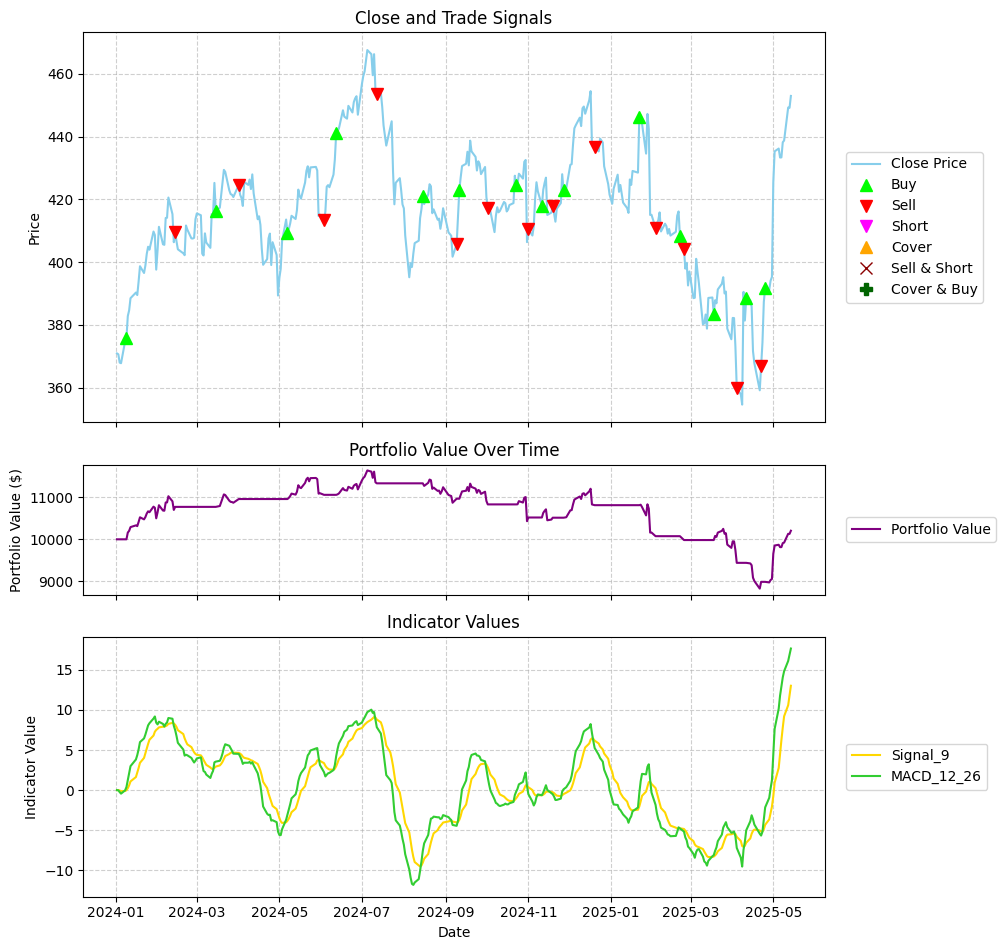

In [3]:
# Run backtest
backtester = CrossTradeBacktester(initial_cash=initial_cash, commission_long=commission)
results, portfolio = backtester.run_cross_trade(
    data=data,
    short_window_indicator="MACD_12_26",
    long_window_indicator="Signal_9",
    price_col='Close',
)

# --- Results ---
backtester.print_results(results)

# Prepare results for plotting
plotter = BacktestPlotter()

# Define the indicator columns explicitly
indicator_cols_to_plot = ["Signal_9", "MACD_12_26"]

fig = plotter.plot_results(
    data_df=data,
    history_df=portfolio,
    price_col='Close',
    indicator_cols=indicator_cols_to_plot, 
    title=f"Cross Trade (Long Only) (Signal_9 vs MACD_12_26)"
)

### Backtest with RSI

Computing RSI...

✨ Band Trade (RSI_14 vs RSI_Lower/RSI_Upper - Mean Reversion) ✨

🗓️ BACKTEST PERIOD:
  • Period: 2020-01-22 to 2024-12-30
  • Duration: 1804 days
  • Trading Days: 1244

📊 BASIC METRICS:
  • Initial Investment: $10,000.00
  • Final Portfolio Value: $11,749.57
  • Total Return: 17.50%
  • Annualized Return: 3.32%
  • Number of Trades: 10
  • Total Commissions: $0.00

📈 BENCHMARK COMPARISON:
  • Benchmark Return: 77.53%
  • Benchmark Final Value: $17,752.76
  • Strategy vs Benchmark: -60.03%

📉 RISK METRICS:
  • Sharpe Ratio: 0.280
  • Sortino Ratio: 0.150
  • Maximum Drawdown: -28.13%
  • Average Drawdown: -3.40%
  • Max Drawdown Duration: 517 days
  • Avg Drawdown Duration: 158.55 days
  • Annualized Volatility: 17.32%



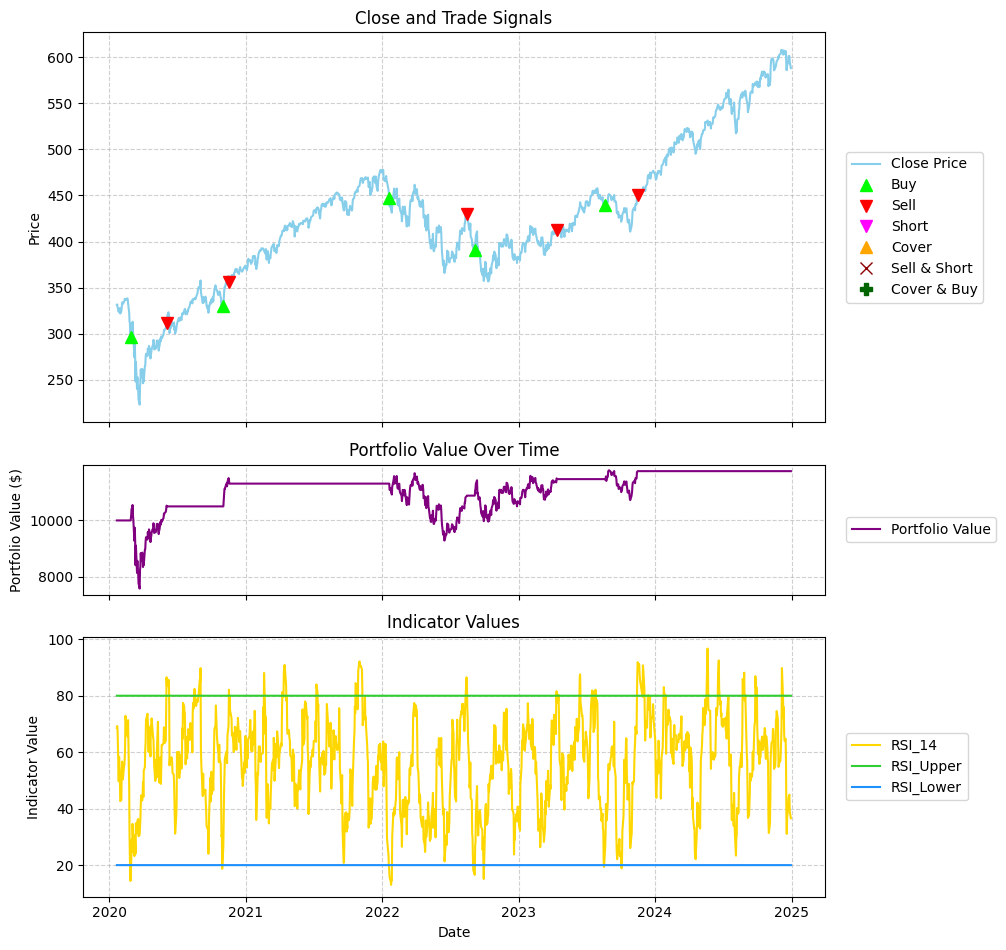

In [4]:
# --- Configuration ---
ticker = 'SPY'
start_date = '2020-01-01'
end_date = '2024-12-31'
rsi_window = 14
rsi_upper_threshold = 80
rsi_lower_threshold = 20
long_entry_pct_cash = 1
short_entry_pct_cash = 0.5
initial_cash = 10000.0
commission = 0.0  # Default commission

# Download data and compute RSI
data = download_data(ticker, start_date, end_date)
parameters = dict()
columns = dict()
parameters["window"] = 14
columns["close_col"] = 'Close'
data = compute_indicator(
    data=data,
    indicator='rsi',
    parameters=parameters,
    columns=columns
)
indicator_col = f'RSI_{rsi_window}'
# Add constant columns for the fixed RSI thresholds
upper_threshold_col = 'RSI_Upper'
lower_threshold_col = 'RSI_Lower'
data[upper_threshold_col] = rsi_upper_threshold
data[lower_threshold_col] = rsi_lower_threshold

# Run backtest
backtester = BandTradeBacktester(initial_cash=initial_cash, commission_long=commission)
results, portfolio = backtester.run_band_trade(
    data=data,
    indicator_col=indicator_col,
    upper_band_col='RSI_Upper',
    lower_band_col='RSI_Lower',
    price_col='Close',
    trading_type='long',
    long_entry_pct_cash = 1,
    short_entry_pct_cash = 0.5,
)

# --- Results ---
backtester.print_results(results)

# Prepare results for plotting
plotter = BacktestPlotter()

# Define the indicator columns explicitly
indicator_cols_to_plot = [f'RSI_{rsi_window}', 'RSI_Upper', 'RSI_Lower']

fig = plotter.plot_results(
    data_df=data,
    history_df=portfolio,
    price_col='Close',
    indicator_cols=indicator_cols_to_plot, 
    title=f"RSI Threshold (Long Only) (RSI-{rsi_window} {rsi_lower_threshold}/{rsi_upper_threshold})"
)